In [15]:
#load libraries
import tweepy
import datetime as dt
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

# Gather

In [19]:
#load first dataset from local machine
twitter_archive = pd.read_csv('C:/Users/Khrystyne/Downloads/twitter-archive-enhanced.csv')

### Web Scrapping

In [16]:
#download image_pridictions.tsv programmatically using the requests library
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open ('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [17]:
#load tsv file:
img = pd.read_csv('image_predictions.tsv'.split('/')[-1], sep = '\t')
img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [3]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

In [21]:
# For loop which will add each available tweet to a new line of tweet_json.txt
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 175
Rate limit reached. Sleeping for: 146
Rate limit reached. Sleeping for: 151
Rate limit reached. Sleeping for: 92


In [4]:
# For loop to append each tweet into a list
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [5]:
tweet_info= pd.DataFrame()

In [12]:
# Add selected variables to tweet_info DataFrame
tweet_info['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))
tweet_info['created_at'] = list(map(lambda tweet: pd.to_datetime(tweet['created_at']), tweets_data))

# Assess

#### twitter_archive

In [13]:
tweet_info.shape

(2648, 4)

In [14]:
tweet_info.head()

,id,retweet_count,favorite_count,created_at
0,892177421306343426,6184,32777,2017-08-01 00:17:27
1,891815181378084864,4092,24684,2017-07-31 00:18:03
2,891689557279858688,8507,41563,2017-07-30 15:58:51
3,891327558926688256,9221,39742,2017-07-29 16:00:24
4,891087950875897856,3068,19944,2017-07-29 00:08:17


In [431]:
twitter_archive[twitter_archive.text == 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None


In [20]:
twitter_archive.shape

(2356, 17)

In [21]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [50]:
twitter_archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [23]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [53]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Oliver         11
Cooper         11
Lola           10
Penny          10
Tucker         10
Bo              9
Winston         9
Sadie           8
the             8
an              7
Buddy           7
Daisy           7
Bailey          7
Toby            7
Scout           6
Jax             6
Dave            6
Oscar           6
Rusty           6
Jack            6
Milo            6
Leo             6
Stanley         6
Koda            6
Bella           6
Gus             5
             ... 
Ben             1
Donny           1
Schnozz         1
Kobe            1
Scruffers       1
Molly           1
Pepper          1
Mitch           1
Billl           1
Cecil           1
Carbon          1
Ebby            1
Jimbo           1
Mack            1
Mingus          1
Chesterson      1
Anna            1
Amélie          1
Finnegus        1
Keet            1
Arlen           1
Sonny           1
Anthony         1
DayZ            1
Pawnd     

In [54]:
twitter_archive[twitter_archive.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [55]:
twitter_archive[twitter_archive.name == 'an']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


In [ ]:
#in the column 'name' where values are == to 'a', 'an' or 'the', this seems to be a case of random dogs and their pictures 
#being shared by users rather than dogs whose owners have shared their names. the words 'a', 'an' or 'the'
#have been used in the text discription of the dogs. all these instanses are also recorded with lowercase
#letters instead of uppercase like the actual dog names that are recorded

In [ ]:
(twitter_archive.loc[(twitter_archive['name'].str.islower()) & (twitter_archive['text'].str.contains('named'))]

In [60]:
twitter_archive.loc[(twitter_archive['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [264]:
str_lower = len(twitter_archive.loc[(twitter_archive['name'].str.islower())])
str_lower

109

In [ ]:
#there are 109 rows with names in name column that are lowercase(not dog names)

In [ ]:
#it appears that there are more instanses of what we described above, where phrases used in the text 
#are recorded as a name. we will have to investigate further in order to be absolutely sure whether
#or not the
#tweet relates to a dog and if its name is mentioned in the text

In [472]:
twitter_archive.loc[(twitter_archive['name'].str.islower()) & (twitter_archive['text'].str.contains('named'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11,10,a,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9,10,a,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002554466305/photo/1,9,10,a,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874861563904/photo/1,9,10,a,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9,10,a,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323644657664/photo/1,10,10,a,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461267722241/photo/1,10,10,a,None,None,None,None
2191,668955713004314625,NaN,NaN,2015-11-24 00:54:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Slovakian Helter Skelter Feta named Leroi. Likes to skip on roofs. Good traction. Much balance. 10/10 wow!

In [102]:
len(twitter_archive.loc[(twitter_archive['name'].str.islower()) & (twitter_archive['text'].str.contains('named'))])

20

In [ ]:
#there are 20 rows with names in name column that are lowercase(not dog names) but have the dog name 
#in the text column 

In [66]:
twitter_archive.loc[(twitter_archive['name'].str.islower()) & (twitter_archive['text'].str.contains('name is'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,None,None,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989...,8,10,a,None,None,None,None


In [ ]:
#there are an additional 2 rows with names in name column that are lowercase(not dog names) but have 
#the dog name 
#in the text column 

In [67]:
#how many are retweets:
twitter_archive.loc[(twitter_archive['text'].str.contains('RT'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
80,877316821321428993,NaN,NaN,2017-06-21 00:06:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dante. At first he wasn't a fan of his ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877316821...,13,10,Dante,None,None,None,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None


In [109]:
len(twitter_archive.loc[(twitter_archive['text'].str.contains('RT'))])

192

In [74]:
twitter_archive[twitter_archive.name == 'None'] #& (twitter_archive['text'].str.contains('name is'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [114]:
len(twitter_archive[twitter_archive.name == 'None'])

745

In [ ]:
#745 rows contain 'None' in the name column

In [113]:
twitter_archive[(twitter_archive.name == 'None') & (twitter_archive['text'].str.contains('name is'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
168,859607811541651456,NaN,NaN,2017-05-03 03:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859607811...,13,10,None,None,None,None,puppo
843,766714921925144576,7.667118e+17,4.196984e+09,2016-08-19 19:14:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",His name is Charley and he already has a new s...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1678,682047327939461121,NaN,NaN,2015-12-30 03:55:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate bears but this one seem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682047327...,10,10,None,None,None,None,None
1734,679736210798047232,NaN,NaN,2015-12-23 18:51:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup's name is Sabertooth (parents must be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679736210...,9,10,None,None,None,None,None
2267,667524857454854144,NaN,NaN,2015-11-20 02:08:22 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Another topnotch dog. His name is Big Jumpy Ra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667524857...,12,10,None,None,None,None,None


In [116]:
len(twitter_archive[(twitter_archive.name == 'None') & (twitter_archive['text'].str.contains('name is'))])

6

In [178]:
twitter_archive.loc[(twitter_archive.name == 'None') & (twitter_archive['text'].str.contains('named'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
603,798628517273620480,NaN,NaN,2016-11-15 20:47:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,6.675094e+17,4.196984e+09,2015-11-20 01:06:48 +0000,"https://twitter.com/dog_rates/status/667509364010450944/photo/1,https://twitter.com/dog_rates/status/667509364010450944/photo/1",12,10,None,None,None,None,None
2166,669363888236994561,NaN,NaN,2015-11-25 03:56:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669363888236994561/photo/1,10,10,None,None,None,None,None
2227,668268907921326080,NaN,NaN,2015-11-22 03:24:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have an Azerbaijani Buttermilk named Guss. He sees a demon baby Hitler behind his owner. 10/10 stays alert https://t.co/aeZykWwiJN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668268907921326080/photo/1,10,10,None,None,None,None,None
2269,667509364010450944,NaN,NaN,2015-11-20 01:06:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667509364010450944/photo/1,12,10,None,None,None,None,None


In [ ]:
#there are 10 rows that contain 'None' in the name column but have the names mentioned in the text
#column

In [433]:
twitter_archive[(twitter_archive.name == 'None') & (twitter_archive['text'].str.contains('this is'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
204,852936405516943360,NaN,NaN,2017-04-14 17:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t…",8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1",13,10,None,None,None,None,None
349,831650051525054464,NaN,NaN,2017-02-14 23:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t.co/piiX0ke8Z6 https://t.co/1UHrKcaCiO",NaN,NaN,NaN,"http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1",13,10,None,None,None,None,None
498,813130366689148928,8.131273e+17,4.196984e+09,2016-12-25 21:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been informed by multiple sources that this is actually a dog elf who's tired from helping Santa all night. Pupgraded to 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
841,766864461642756096,NaN,NaN,2016-08-20 05:08:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs... this is a Taiwanese Guide Walrus. Im getting real heckin tired of this. Please send dogs. 10/10 https:/…,7.599238e+17,4.196984e+09,2016-08-01 01:28:46 +0000,https://twitter.com/dog_rates/status/759923798737051648/photo/1,10,10,None,None,None,None,None
887,759923798737051648,NaN,NaN,2016-08-01 01:28:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs... this is a Taiwanese Guide Walrus. Im getting real heckin tired of this. Please send dogs. 10/10 https://t.co/49hkNAsubi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759923798737051648/photo/1,10,10,None,None,None,None,None
893,759446261539934208,NaN,NaN,2016-07-30 17:51:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",No no no this is all wrong. The Walmart had to have run into the dog driving the car. 10/10 someone tell him it's ok\nhttps://t.co/fRaTGcj68A,NaN,NaN,NaN,https://twitter.com/wsaznews/status/759167558763196416,10,10,None,None,None,None,None
1051,742534281772302336,NaN,NaN,2016-06-14 01:49:03 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","For anyone who's wondering, this is what happens after a doggo catches it's tail... 11/10 https://t.co/G4fNhzelDv",NaN,NaN,NaN,

In [ ]:
#some rows with the name none do have the dog names in the text

In [131]:
#expanded url's:
#twitter_archive[twitter_archive.expanded_urls]

twitter_archive.expanded_urls.isnull().sum()

59

During the visual assessment of the tweet_archive dataset, there are unusaul characters('&amp;') in the text column, we will take a further look.

In [51]:
twitter_archive[twitter_archive.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Indie. She's not a fan of baths but she's...,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https...",12,10,Indie,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Pipsy. He is a fluffbal...,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chester (bottom) &amp; Harold (top). They...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053...,12,10,Chester,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's preparing for takeoff. Ma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264...,11,10,Roosevelt,None,None,None,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
898,758854675097526272,NaN,NaN,2016-07-29 02:40:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilli Bee &amp; Honey Bear. Unfortunat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758854675...,11,10,Lilli,None,None,None,None
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None


In [25]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [26]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [27]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [28]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [29]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [30]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [84]:
twitter_archive[twitter_archive.rating_numerator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [63]:
twitter_archive[twitter_archive.rating_numerator == 420]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [91]:
twitter_archive[twitter_archive.rating_numerator > 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


In [97]:
len(twitter_archive[twitter_archive.rating_numerator > 15])

26

In [31]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [93]:
twitter_archive[twitter_archive.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [95]:
twitter_archive[twitter_archive.rating_denominator < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [40]:
twitter_archive[twitter_archive.duplicated()].sum()

tweet_id                      0.0
in_reply_to_status_id         0.0
in_reply_to_user_id           0.0
timestamp                     0.0
source                        0.0
text                          0.0
retweeted_status_id           0.0
retweeted_status_user_id      0.0
retweeted_status_timestamp    0.0
expanded_urls                 0.0
rating_numerator              0.0
rating_denominator            0.0
name                          0.0
doggo                         0.0
floofer                       0.0
pupper                        0.0
puppo                         0.0
dtype: float64

#### images dataset

In [32]:
img.shape

(2075, 12)

In [34]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [35]:
img.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [117]:
img[img.p1_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


In [120]:
len(img[img.p1_dog == False])

543

In [121]:
len(img[img.p2_dog == False])

522

In [122]:
len(img[img.p3_dog == False])

576

In [145]:
len(img[(img.p1_dog == False) & (img.p2_dog == False)])

388

In [135]:
img[img.img_num == 0]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [137]:
img.duplicated().sum()

0

In [42]:
img.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
beagle                        18
Maltese_dog                   18
Shetland_sheepdog             18
Eskimo_dog                    18
teddy                         18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [43]:
img.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
Pembroke                           27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
chow                               20
toy_terrier                        20
Samoyed                            20
malinois                           20
miniature_pinscher                 20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [44]:
img.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

#### tweet_info

In [46]:
tweet_info.shape

(2648, 4)

In [47]:
tweet_info.head(20)

,id,retweet_count,favorite_count,created_at
0,892177421306343426,6184,32777,2017-08-01 00:17:27
1,891815181378084864,4092,24684,2017-07-31 00:18:03
2,891689557279858688,8507,41563,2017-07-30 15:58:51
3,891327558926688256,9221,39742,2017-07-29 16:00:24
4,891087950875897856,3068,19944,2017-07-29 00:08:17
5,890971913173991426,2034,11673,2017-07-28 16:27:12
6,890729181411237888,18590,64521,2017-07-28 00:22:40
7,890609185150312448,4207,27415,2017-07-27 16:25:51
8,890240255349198849,7275,31459,2017-07-26 15:59:51
9,890006608113172480,7222,30240,2017-07-26 00:31:25


In [48]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 4 columns):
id                2648 non-null int64
retweet_count     2648 non-null int64
favorite_count    2648 non-null int64
created_at        2648 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 82.8 KB


-Quality observation:
    
-twitter_archive:
    -tweet_id is recorded as a int 
    -timestamp is recorded as a str
    -rating_numerator and rating_denominator have unusually high values, since the ratings are out of 10
            - id 810984652412424192 ratings have been incorrectly entered. There seems to have been a misunderstanding in the text with the text 'She smiles 24/7' the 24/7 has been mistook as the numerator and denominator. Same this happens for id 666287406224695296 ('3 and 1/2 legged')
            - id 855862651834028034 rating of 420 is for snoop dog, the r n b artist, and not an actual dog
            -id 835246439529840640 has a numerator of 960 and a demoninator of 0
    -there are unusaul characters('&amp;') in the text column
    -both lowercase and uppercase first letters in names appear in the  name column
     -name column has some values that are not consistent with a name(a, an, the)
     -some rows with names not consistent with a name(a, an, the) do in fact have the dog names mentioned in the text column(these are all lowercase names and appear to not be dog names)
             -there are 109 rows with names in name column that are lowercase(not dog names), 22 of these rows contain the dogs' name in the text column 
    
     -there are 745 rows that contain 'None' in the name column, 8 of these rows contain the dogs' name in the text column 
     
     -there are 59 rows with no images(expanded_urls)

    
-Image dataset:
    -p1, p2, and p3 have inconsistent dog breed discriptions(e.g shopping cart, bookcase...)
    -both lowercase and uppercase first letters in names appear in the p1, p2 and p3 columns
    -tweet_id is an int
    -column names are unclear
    
    
-tweet_info:
    -id is an int and not a str
    -id column needs to be  renamed to tweet_id for merge
   

    
 
 
-Tidiness:

-twitter_archive:
 -dog Stages have values as columns, instead of one column called 'stage'
 -we have 3 datasets that can be merged into one

# Clean

In [474]:
#make a copy of datasets:
twitter_arch_clean = twitter_archive.copy()
img_clean = img.copy()
tweet_info_clean = tweet_info.copy()

In [475]:
twitter_arch_clean.shape[0]

2356

### twitter_archive:


### Firstly we will need to drop columns that are unnecessary

### Define

-Drop unnecessary columns

In [521]:
twitter_arch_clean.shape[1]

17

In [522]:
#drop columns that are not needed:
twitter_arch_clean.drop(twitter_arch_clean.columns[[1, 2, 6, 7, 8]], axis = 1, inplace = True)

### Test

In [523]:
#droped columns
twitter_arch_clean.shape[1]

12

In [524]:
#were the columns successfully dropped?
twitter_arch_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None


### -can not read the full text of the text column

#### Define

-Expand text column to read all of the text

### Code

In [35]:
pd.set_option('display.max_colwidth', -1)

#### Test 

In [242]:
twitter_arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### -name column has some values that are not consistent with a name(a, an, the)

### -some rows with names not consistent with a name(a, an, the) do in fact have the dog names mentioned in the text column(these are all lowercase names and appear to not be dog names)
     -there are 109 rows with names in name column that are lowercase(not dog names), 22 of these  
     rows contain the dogs' name in the text column 
    
     -there are 745 rows that contain 'None' in the name column, 10 of these rows contain the dogs'
     name in the text column 

### Define

-Change incorrect dog names

-Take a closer look at the rows that have 'None' in name column

-Drop rows in name column that have 'None'

### Code

In [157]:
twitter_arch_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1332,705475953783398401,NaN,NaN,2016-03-03 19:32:29,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Zara. She found a sandal and couldn't be happier. 12/10 great work https://t.co/zQUuVu812n,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/705475953783398401/photo/1,https://twitter.com/dog_rates/status/705475953783398401/photo/1",12,10,Zara,None,None,None,None
691,787322443945877504,NaN,NaN,2016-10-15 16:01:13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lincoln. He forgot to use his blinker when he changed lanes just now. Guilty as h*ck. Still 10/10 https://t.co/lsrR83SiVp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787322443945877504/photo/1,10,10,Lincoln,None,None,None,None
330,833124694597443584,NaN,NaN,2017-02-19 01:23:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gidget. She's a spy pupper. Stealthy as h*ck. Must've slipped pup and got caught. 12/10 would forgive then pet https://t.co/zD97KYFaFa,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/833124694597443584/photo/1,https://twitter.com/dog_rates/status/833124694597443584/photo/1,https://twitter.com/dog_rates/status/833124694597443584/photo/1",12,10,Gidget,None,None,pupper,None
585,800018252395122689,NaN,NaN,2016-11-19 16:49:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo doin a struggle. 11/10 much determined https://t.co/gQqRBfkX4I,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800018252395122689/video/1,11,10,None,doggo,None,None,None
1565,688064179421470721,NaN,NaN,2016-01-15 18:24:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kilo. He's a Pouncing Brioche. Really likes snow. 11/10 https://t.co/GS76SfkraY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688064179421470721/photo/1,11,10,Kilo,None,None,None,None
895,759159934323924993,NaN,NaN,2016-07-29 22:53:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: AT DAWN...\nWE RIDE\n\n11/10 https://t.co/QnfO7HEQGA,6.703191e+17,4.196984e+09,2015-11-27 19:11:49 +0000,"https://twitter.com/dog_rates/status/670319130621435904/photo/1,https://twitter.com/dog_rates/status/670319130621435904/photo/1",11,10,None,None,None,None,None
1309,707059547140169728,NaN,NaN,2016-03-08 04:25:07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Cupcake. She's an Icelandic Dippen Dot. Confused by the oddly geometric lawn pattern. 11/10 https://t.co/D7rorf4YKL,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/707059547140169728/photo/1,https://twitter.com/dog_rates/status/707059547140169728/photo/1",11,10,Cupcake,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1",143,130,None,None,None,None,None
1743,679405845277462528,NaN,NaN,2015-12-22 20:59:10,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Crazy unseen footage from Jurassic Park. 10/10 for both dinosaur puppers https://t.co/L8wt2IpwxO,NaN,NaN,NaN,https://vine.co/v/iKVFEigMLxP,10,10,None,None,None,None,None
247,845459076796616705,NaN,NaN,2017-03-25 02:15:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Here's a he

In [476]:
#create variables:
named = twitter_arch_clean.loc[(twitter_arch_clean['name'].str.islower()) & (twitter_arch_clean['text'].str.contains('named'))]

name_is = twitter_arch_clean.loc[(twitter_arch_clean['name'].str.islower()) & (twitter_arch_clean['text'].str.contains('name is'))]

none_named = twitter_arch_clean.loc[(twitter_arch_clean.name == 'None') & (twitter_arch_clean['text'].str.contains('named'))]

none_name_is = twitter_arch_clean.loc[(twitter_arch_clean.name == 'None') & (twitter_arch_clean['text'].str.contains('name is'))]

no_name = twitter_arch_clean.loc[(twitter_arch_clean['name'].str.islower())]

In [477]:
twitter_arch_clean.shape[0]

2356

In [478]:
print('Out of all the lowercase names, {} of these names appear in the text column'.format(len(named) + len(name_is)))
print("Out of all of the rows that contain 'None' in the name column, {} of these rows contain the dogs' \n name in the text column".format(len(none_named) + len(none_name_is)))

Out of all the lowercase names, 22 of these names appear in the text column
Out of all of the rows that contain 'None' in the name column, 10 of these rows contain the dogs' 
 name in the text column


In [313]:
twitter_arch_clean[['text', 'name']].sample(10)

,text,name
1502,This is Teddy. His head is too heavy. 13/10 (vid by @jooanrim) https://t.co/sRUpRpGZ3y,Teddy
1625,This little fella really hates stairs. Prefers bush. 13/10 legendary pupper https://t.co/e3LPMAHj7p,None
703,This is Lucy. She's strives to be the best potato she can be. 12/10 would boop https://t.co/lntsj7Fc4Y,Lucy
384,This is Loki. He smiles like Elvis. Ain't nothin but a hound doggo. 12/10 https://t.co/QV5nx6otZR,Loki
2002,Say hello to Jazz. She should be on the cover of Vogue. 12/10 gorgeous pupper https://t.co/mVCMemhXAP,Jazz
2225,Meet Rusty. Rusty's dreaming of a world where Twitter never got rid of favorites. Looks like a happy world. 11/10 https://t.co/C8U6cxI1Jc,Rusty
1670,This is Patrick. He's a bigass pupper. 7/10 https://t.co/J9DXBFoAQe,Patrick
912,Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,None
2035,This is Oscar. He's ready for Christmas. 11/10 https://t.co/TON0Irzgwr,Oscar
677,RT @dog_rates: This is Meyer. He has to hold somebody's hand during car rides. He's also wearing a seatbelt. 12/10 responsible af https://t…,Meyer


In [479]:
#save to list:
named_list = named['text'].tolist()
name_is_list = name_is['text'].tolist()
none_named_list = none_named['text'].tolist()
none_name_is_list = none_name_is['text'].tolist()
no_name_list = no_name['text'].tolist()

In [480]:
twitter_arch_clean.shape[0]

2356

In [481]:
#itterate through rows where the name is lowercase and 'named' appears in text column
#set name column value to the word that appears after the word 'named' in text column
import re

for name in named_list:
    text = twitter_arch_clean.text == name
    name_col = 'name'
    twitter_arch_clean.loc[text, name_col] = re.findall(r"named\s(\w+)", name)
    

In [377]:
twitter_arch_clean.shape[0]

2356

In [484]:
#itterate through rows where the name is lowercase and 'name is' appears in text column
#set name column value to the word that appears after the word 'name is' in text column
for name in name_is_list:
    text = twitter_arch_clean.text == name
    name_col = 'name'
    twitter_arch_clean.loc[text, name_col] = re.findall(r"name is\s(\w+)", name)

In [379]:
twitter_arch_clean.shape[0]

2356

===============================
#### name == 'None'

In [487]:
#itterate through rows where the name is 'None' and 'named' appears in text column
#replce 'None' with the word that appears after the word 'named' in text column
for name in none_named_list:
    text = twitter_arch_clean.text == name
    name_col = 'name'
    twitter_arch_clean.loc[text, name_col] = re.findall(r"named\s(\w+)", name)

In [381]:
twitter_arch_clean.shape[0]

2356

In [490]:
#itterate through rows where the name is 'None' and 'name is' appears in text column
#replce 'None' with the word that appears after the word 'named' in text column
for name in none_name_is_list:
    text = twitter_arch_clean.text == name
    name_col = 'name'
    twitter_arch_clean.loc[text, name_col] = re.findall(r"name is\s(\w+)", name)

===============================

In [383]:
twitter_arch_clean.shape[0]

2356

In [405]:
clean_str_lower = len(twitter_arch_clean.loc[(twitter_arch_clean['name'].str.islower())])
clean_str_lower

87

During our assessment we found that there were 109 rows with lowercase names in the name column, whereby these names represented non-dog names. throughout the assessment it was discovered that some of these rows do have the dog names in the text column. We have extracted said names from the text column and we are now left with 87 rows with lowercase names in the name column. This will be delt with next

In [406]:
print('We are now going to deal with the remaining {} rows that still appear to have lowercase names, these will be replaced with "None".'.format(str_lower - clean_str_lower))

We are now going to deal with the remaining 22 rows that still appear to have lowercase names, these will be replaced with "None".


In [407]:
twitter_arch_clean.shape[0]

2356

In [493]:
#itterate through rows where the name is lowercase
#replce name value to 'None'
for name in no_name_list:
    text = twitter_arch_clean.text == name
    name_col = 'name'
    twitter_arch_clean.loc[text, name_col] = 'None'

### Test

In [483]:
#were the names in the text column successfully pulled and replace the lowercase word in name column?
#the output should be empty
twitter_arch_clean.loc[(twitter_arch_clean['name'].str.islower()) & (twitter_arch_clean['text'].str.contains('named'))]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [482]:
#check one of the ids that had the dog name in the text column but had a lowercase word in the name column
#named loop
twitter_arch_clean[twitter_arch_clean.tweet_id == 675706639471788032]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,Wylie,None,None,None,None


In [485]:
#name is loop
twitter_arch_clean[twitter_arch_clean.tweet_id == 765395769549590528]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13,10,Zoey,None,None,None,None


In [486]:
#should be empty
twitter_arch_clean.loc[(twitter_arch_clean['name'].str.islower()) & (twitter_arch_clean['text'].str.contains('name is'))]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [489]:
twitter_arch_clean.loc[(twitter_arch_clean.name == 'None') & (twitter_arch_clean['text'].str.contains('named'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [488]:
#none and named loop
twitter_arch_clean[twitter_arch_clean.tweet_id == 667509364010450944]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2269,667509364010450944,NaN,NaN,2015-11-20 01:06:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667509364010450944/photo/1,12,10,Tickles,None,None,None,None


In [491]:
#none and name is loop
twitter_arch_clean[twitter_arch_clean.tweet_id == 885518971528720385]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,Howard,None,None,None,None


In [492]:
twitter_arch_clean.loc[(twitter_arch_clean.name == 'None') & (twitter_arch_clean['text'].str.contains('name is'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [494]:
#there are no more lowercase(not dog names) in the name column
twitter_arch_clean.loc[(twitter_arch_clean['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Take a closer look at the rows that have 'None' in name column

### Code

In [495]:
#check none rows for name column:
none_name = twitter_arch_clean[twitter_arch_clean.name == 'None']

none_name


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,None,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1",13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58

In [412]:
print(len(none_name))

844


In [496]:
twitter_arch_clean[(twitter_arch_clean.name == 'None') & (twitter_arch_clean['text'].str.contains('this is'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
204,852936405516943360,NaN,NaN,2017-04-14 17:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t…",8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1",13,10,None,None,None,None,None
349,831650051525054464,NaN,NaN,2017-02-14 23:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t.co/piiX0ke8Z6 https://t.co/1UHrKcaCiO",NaN,NaN,NaN,"http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1",13,10,None,None,None,None,None
498,813130366689148928,8.131273e+17,4.196984e+09,2016-12-25 21:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been informed by multiple sources that this is actually a dog elf who's tired from helping Santa all night. Pupgraded to 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,None,None,None,None,None
841,766864461642756096,NaN,NaN,2016-08-20 05:08:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs... this is a Taiwanese Guide Walrus. Im getting real heckin tired of this. Please send dogs. 10/10 https:/…,7.599238e+17,4.196984e+09,2016-08-01 01:28:46 +0000,https://twitter.com/dog_rates/status/759923798737051648/photo/1,10,10,None,None,None,None,None
887,759923798737051648,NaN,NaN,2016-08-01 01:28:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs... this is a Taiwanese Guide Walrus. Im getting real heckin tired of this. Please send dogs. 10/10 https://t.co/49hkNAsubi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759923798737051648/photo/1,10,10,None,None,None,None,None
893,759446261539934208,NaN,NaN,2016-07-30 17:51:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollo

By visually inspecting this subset, we can see that there are dog names in the text column while the name column has been recoreded as 'None'. We will fix these rows before removing all the rows with none to maintain the integrity of the data

In [497]:
#it would be best to correct this manually:
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 831650051525054464), 'name'] = 'Blue'
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 740373189193256964), 'name'] = 'Bretagne'
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 675870721063669760), 'name'] = 'Yoshi'

### Test

In [498]:
twitter_arch_clean[twitter_arch_clean.tweet_id == 831650051525054464]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
349,831650051525054464,NaN,NaN,2017-02-14 23:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t.co/piiX0ke8Z6 https://t.co/1UHrKcaCiO",NaN,NaN,NaN,"http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1",13,10,Blue,None,None,None,None


In [499]:
twitter_arch_clean[(twitter_arch_clean.name == 'None') & (twitter_arch_clean['text'].str.contains('this is'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
204,852936405516943360,NaN,NaN,2017-04-14 17:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t…",8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1",13,10,None,None,None,None,None
498,813130366689148928,8.131273e+17,4.196984e+09,2016-12-25 21:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been informed by multiple sources that this is actually a dog elf who's tired from helping Santa all night. Pupgraded to 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,None,None,None,None,None
841,766864461642756096,NaN,NaN,2016-08-20 05:08:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs... this is a Taiwanese Guide Walrus. Im getting real heckin tired of this. Please send dogs. 10/10 https:/…,7.599238e+17,4.196984e+09,2016-08-01 01:28:46 +0000,https://twitter.com/dog_rates/status/759923798737051648/photo/1,10,10,None,None,None,None,None
887,759923798737051648,NaN,NaN,2016-08-01 01:28:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs... this is a Taiwanese Guide Walrus. Im getting real heckin tired of this. Please send dogs. 10/10 https://t.co/49hkNAsubi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759923798737051648/photo/1,10,10,None,None,None,None,None
893,759446261539934208,NaN,NaN,2016-07-30 17:51:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",No no no this is all wrong. The Walmart had to have run into the dog driving the car. 10/10 someone tell him it's ok\nhttps://t.co/fRaTGcj68A,NaN,NaN,NaN,https://twitter.com/wsaznews/status/759167558763196416,10,10,None,None,None,None,None
1051,742534281772302336,NaN,NaN,2016-06-14 01:49:03 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","For anyone who's wondering, this is what happens after a doggo catches it's tail... 11/10 https://t.co/G4fNhzelDv",NaN,NaN,NaN,https://vine.co/v/iLTZmtE1FTB,11,10,None,doggo,None,None,None
1111,733482008106668032,NaN,NaN,2016-05-20 02:18:32 +0000,"<a href=""h

In [504]:
twitter_arch_clean[twitter_arch_clean.name == 'None'].sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1873,675145476954566656,NaN,NaN,2015-12-11 02:49:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What an honor. 3 dogs here. Blond one is clearly a gymnast. Other two just confused. Very nifty pups. 9/10 for all https://t.co/YDgstgIDGs,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675145476954566656/photo/1,9,10,None,None,None,None,None
478,815966073409433600,NaN,NaN,2017-01-02 17:00:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a pupper with squeaky hiccups. Please enjoy. 13/10 https://t.co/MiMKtsLN6k,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815966073409433600/video/1,13,10,None,None,None,pupper,None
1729,679862121895714818,NaN,NaN,2015-12-24 03:12:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Dammit hooman I'm jus trynna lik the fler"" 11/10 https://t.co/eRZRI8OTj7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/679862121895714818/photo/1,11,10,None,None,None,None,None
1015,747103485104099331,NaN,NaN,2016-06-26 16:25:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys... I said DOGS with ""shark qualities"" or ""costumes."" Not actual sharks. This did me a real frighten ...11/10 https://t.co/DX1JUHJVN7",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747103485104099331/photo/1,https://twitter.com/dog_rates/status/747103485104099331/photo/1,https://twitter.com/dog_rates/status/747103485104099331/photo/1,https://twitter.com/dog_rates/status/747103485104099331/photo/1",11,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1",13,10,None,None,None,None,None
1100,735648611367784448,NaN,NaN,2016-05-26 01:47:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",*faints* 12/10 perfection in pupper form https://t.co/t6TxTwTLEK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735648611367784448/photo/1,12,10,None,None,None,pupper,None
494,813187593374461952,NaN,NaN,2016-12-26 01:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please don't send in other things like this very good Christmas tree. Thank you... 13/10 https://t.co/rvSANEsQZJ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813187593374461952/photo/1,13,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
1907,674447403907457024,NaN,NaN,2015-12-09 04:36:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper just wants a belly rub. This pupper has nothing to do w the tree being sideways now. 10/10 good pupper https://t.co/AyJ7Ohk71f,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674447403907457024/photo/1,10,10,None,None,None,pupper,None
1816,676606785097199616,NaN,NaN,2015-12-15 03:36:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nof

In [503]:
len(twitter_arch_clean[twitter_arch_clean.name == 'None'])

841

There does not appear to be anymore rows in the text column that have dog names mentioned

### There appear to be a large number of retweets

### Define

-Identify retweets

-Drop rows with retweets

### Code

In [507]:
twitter_arch_clean.shape[0]

2356

In [513]:
#identify retweets:
retweets = twitter_arch_clean.loc[(twitter_arch_clean['text'].str.contains('RT'))]
retweets.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [506]:
len(retweets)

192

There are 192 retweets that will have to be removed

In [508]:
#Drop rows with retweets:
twitter_arch_clean = twitter_arch_clean.drop(retweets.index, axis = 0)

### Test

In [514]:
twitter_arch_clean.loc[(twitter_arch_clean['text'].str.contains('RT'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [516]:
len(twitter_arch_clean.loc[(twitter_arch_clean['text'].str.contains('RT'))])

0

In [517]:
twitter_arch_clean.shape[0]

2164

from 2356 rows, we now have 2164 without the retweets

### Code

In [413]:
#drop rows in name column that are == 'None' as the majority of these seem to be comments on original
#tweets

#twitter_arch_clean = twitter_arch_clean[twitter_arch_clean.name != 'None']
#twitter_arch_clean = twitter_arch_clean.drop(none_name.index, axis = 0)

### Test

In [414]:
#twitter_arch_clean[twitter_arch_clean.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [502]:
#twitter_arch_clean.shape[0]

2356

In [ ]:
#We initially had 2356 rows in our twitter_archive dataframe, after cleaning, we now have 2247 rows.

### -rating_numerator and rating_denominator have unusually high values, since the ratings are out of 10
            - id 810984652412424192 ratings have been incorrectly entered. There seems to have been
            a misunderstanding in the text with the text 'She smiles 24/7' the 24/7 has been
            mistook as the numerator and denominator. Same thing happens for id 666287406224695296
            ('3 and 1/2 legged') 
            
            - id 855862651834028034 rating of 420 is for snoop dog, the r n b artist, and not an 
            actual dog
            
            -id 835246439529840640 has a numerator of 960 and a demoninator of 0

### Define

-Fix ratings numerators and denominators
    

### Code

In [518]:
#Change numerator and denomenator type from int to float to allow decimals:
twitter_arch_clean[['rating_numerator', 'rating_denominator']] = twitter_arch_clean[['rating_numerator','rating_denominator']].astype(float)

In [526]:
#check id 810984652412424192 ratings, is there a proper rating in text column?
twitter_arch_clean[twitter_arch_clean.tweet_id == 810984652412424192]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,7.0,Sam,None,None,None,None


tweet_id 810984652412424192 has no actual rating


In [527]:
#check id 666287406224695296 ratings, is there a proper rating in text column?
twitter_arch_clean[twitter_arch_clean.tweet_id == 666287406224695296]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1.0,2.0,None,None,None,None,None


tweet_id 666287406224695296 rating has been misundersted as 1/2, when it is 9/10.

In [528]:
#check id 855862651834028034 ratings, is there a proper rating in text column?
twitter_arch_clean[twitter_arch_clean.tweet_id == 855862651834028034]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,420.0,10.0,None,None,None,None,None


This is a comment not pertaining to an actual dog at all.

In [529]:
#check id 835246439529840640 ratings, is there a proper rating in text column?
twitter_arch_clean[twitter_arch_clean.tweet_id == 835246439529840640]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960.0,0.0,None,None,None,None,None


id 835246439529840640 is also a tweet that does not relate to a dog

In [530]:
#remove these rows:
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean['tweet_id'] != 810984652412424192]
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean['tweet_id'] != 855862651834028034]
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean['tweet_id'] != 835246439529840640]


In [536]:
#test that the rows have been removed:
twitter_arch_clean[twitter_arch_clean['tweet_id'] == 810984652412424192]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [534]:
#uodate tweet_id 666287406224695296 to represent the correct rating
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

In [535]:
#test that tweet_id 666287406224695296 has been updated to correct rating:
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 666287406224695296)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9.0,10.0,None,None,None,None,None


In [537]:
#view tweets with decimals in text column:
twitter_arch_clean[twitter_arch_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\Khrystyne\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",9.0,10.0,Bella,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75.0,10.0,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27.0,10.0,Sophie,None,None,pupper,None
1689,681340665377193984,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,5.0,10.0,None,None,None,None,None
1712,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26.0,10.0,None,None,None,None,None


In [538]:
#set the correct numerators for the above tweets:
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26


In [539]:
#tweets with denominator not equal to 10 
twitter_arch_clean[twitter_arch_clean.rating_denominator > 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,11.0,15.0,None,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84.0,70.0,None,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150.0,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9.0,11.0,Bretagne,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204.0,170.0,None,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4.0,20.0,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50.0,50.0,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99.0,90.0,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80.0,80.0,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45.0,50.0,None,None,None,None,None


tweet id 716439118184652801 and 740373189193256964 was incorrectly extracted and the rest of the tweets
with a denominator above 10 appear to be of multiple dogs

In [540]:
#fix ratings for id 716439118184652801 and 740373189193256964:
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 11
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14

### Test

In [525]:
#dtypes
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2164 non-null int64
timestamp             2164 non-null object
source                2164 non-null object
text                  2164 non-null object
expanded_urls         2106 non-null object
rating_numerator      2164 non-null float64
rating_denominator    2164 non-null float64
name                  2164 non-null object
doggo                 2164 non-null object
floofer               2164 non-null object
pupper                2164 non-null object
puppo                 2164 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 219.8+ KB


In [426]:
#have decimals been updated?
twitter_arch_clean[twitter_arch_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]
#the second row was not updated because it is a retweet

C:\Users\Khrystyne\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10.0,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75.00,10.0,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10.0,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10.0,Sophie,None,None,pupper,None


In [544]:
#check that id 716439118184652801 and 740373189193256964 have been updated correctly
twitter_arch_clean[twitter_arch_clean.tweet_id == 740373189193256964]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14.0,10.0,Bretagne,None,None,None,None


In [545]:
twitter_arch_clean[twitter_arch_clean.tweet_id == 716439118184652801]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11.0,10.0,Bluebert,None,None,None,None


### tweet_id is recorded as a int 
### timestamp is recorded as a str

### Define

-Change tweet_if from an int to a str

-Change timestamp from str to datetime

### Code

In [546]:
#tweet_id
twitter_arch_clean.tweet_id = twitter_arch_clean.tweet_id.astype(str)

In [547]:
#timestamp
twitter_arch_clean.timestamp = pd.to_datetime(twitter_arch_clean['timestamp'])

### Test 

In [548]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2161 non-null object
timestamp             2161 non-null datetime64[ns]
source                2161 non-null object
text                  2161 non-null object
expanded_urls         2105 non-null object
rating_numerator      2161 non-null float64
rating_denominator    2161 non-null float64
name                  2161 non-null object
doggo                 2161 non-null object
floofer               2161 non-null object
pupper                2161 non-null object
puppo                 2161 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 219.5+ KB


### there are unusaul characters in the text column

### Define

-Remove the extra characters after & in the text column

### Code

In [549]:
twitter_arch_clean['text'] = twitter_arch_clean['text'].str.replace('&amp;', '&')

### Test

In [550]:
twitter_arch_clean[twitter_arch_clean.text == '&amp;']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [556]:
twitter_arch_clean[twitter_arch_clean.text.str.contains('&')].head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
113,870726314365509632,2017-06-02 19:38:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,10.0,10.0,None,None,None,None,None
262,842765311967449089,2017-03-17 15:51:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Indie. She's not a fan of baths but she's definitely a fan of hide & seek. 12/10 click the link to help Indie\n\nhttps://t.co/fvGkIuAlFK https://t.co/kiCFtmJd7l,"https://www.gofundme.com/get-indie-home/,https://twitter.com/dog_rates/status/842765311967449089/photo/1,https://twitter.com/dog_rates/status/842765311967449089/photo/1",12.0,10.0,Indie,None,None,None,None
274,840698636975636481,2017-03-11 22:59:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@0_kelvin_0 &gt;10/10 is reserved for puppos sorry Kevin,NaN,10.0,10.0,None,None,None,None,None
320,834458053273591808,2017-02-22 17:41:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Chester (bottom) & Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe",https://twitter.com/dog_rates/status/834458053273591808/photo/1,12.0,10.0,Chester,None,None,None,None
387,826598799820865537,2017-02-01 01:11:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,7.0,10.0,None,None,None,None,None


### dog Stages have values as columns, instead of one column called 'stage'

### Define

-Create a dog_stage column with the variables puppo, pupper, floofer and doggo

-Drop puppo, pupper, floofer and doggo columns

### Code

In [559]:
#create column
twitter_arch_clean['dog_stage'] = twitter_arch_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand = True)

In [572]:
twitter_arch_clean.shape[1]

13

In [573]:
#delete columns:
twitter_arch_clean.drop(twitter_arch_clean.columns[[8, 9, 10, 11]], axis = 1, inplace = True)


### Test 

In [564]:
twitter_arch_clean['dog_stage'].value_counts()

pupper     243
doggo      83 
puppo      32 
floofer    4  
Name: dog_stage, dtype: int64

In [574]:
twitter_arch_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN


In [575]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2161 non-null object
timestamp             2161 non-null datetime64[ns]
source                2161 non-null object
text                  2161 non-null object
expanded_urls         2105 non-null object
rating_numerator      2161 non-null float64
rating_denominator    2161 non-null float64
name                  2161 non-null object
dog_stage             362 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 168.8+ KB


In [576]:
twitter_arch_clean.shape[1]

9

### Image dataset

Description of dataset:

    -table full of image predictions(only the top 3)

    -p1 -> pridiction 1
    
    -p2 -> pridiction 2
    
    -p3 -> pridiction 3
    
    -p1_conf, p2_conf, p3_conf -> the confidence level of the prediction of whether its a dog or
    not in the image
    
    -p1_dog, p2_dog, p3_dog -> wether the object in the image is in fact a dog or not(True/False)

In [ ]:
#-Image dataset:
    
   # -p1, p2, and p3 -> choose the best predictions and drop the rest of the columns
   # -both lowercase and uppercase first letters in names appear in the p1, p2 and p3 columns
   # -tweet_id is an int
   # -column names are unclear

In [579]:
img_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
1789,829878982036299777,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,1,golden_retriever,0.617389,True,Labrador_retriever,0.337053,True,tennis_ball,0.008554,False
1073,716802964044845056,https://pbs.twimg.com/media/CfKYfeBXIAAopp2.jpg,2,malinois,0.619577,True,Leonberg,0.118089,True,bull_mastiff,0.066508,True
831,693642232151285760,https://pbs.twimg.com/media/CaBP7i9W0AAJrIs.jpg,1,Scottish_deerhound,0.111893,True,bluetick,0.074302,True,German_short-haired_pointer,0.067000,True
1121,726887082820554753,https://pbs.twimg.com/media/ChZr8SdWIAAVQKt.jpg,1,soft-coated_wheaten_terrier,0.515919,True,Irish_terrier,0.162655,True,Chesapeake_Bay_retriever,0.125182,True


In [616]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### p1, p2, and p3 -> choose the best predictions and drop the rest of the columns

### Define

-Create 1 column for image prediction and 1 column for confidence level


### Code

In [582]:
img_clean[img_clean.p1_dog == img.p2_dog]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


p1_conf is almost always higher than p2_conf and p3_conf is almost always lower than both p1_conf and p2_conf

In [585]:
img_clean[(img_clean.p1_dog == True) & (img_clean.p2_dog == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
34,666435652385423360,https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg,1,Chesapeake_Bay_retriever,0.184130,True,chain_saw,0.056775,False,power_drill,3.676340e-02,False
48,666826780179869698,https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg,1,Maltese_dog,0.359383,True,teddy,0.148759,False,West_Highland_white_terrier,1.060070e-01,True
82,667491009379606528,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,5.729980e-03,False
83,667495797102141441,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,True,Christmas_stocking,0.118651,False,ski_mask,9.248170e-02,False
104,667832474953625600,https://pbs.twimg.com/media/CUSeGFNW4AAyyHC.jpg,1,miniature_pinscher,0.214200,True,bath_towel,0.146789,False,Chihuahua,1.041520e-01,True
114,667924896115245057,https://pbs.twimg.com/media/CUTyJpHWcAATl0O.jpg,1,Labrador_retriever,0.209051,True,hog,0.203980,False,Newfoundland,1.659140e-01,True
119,668171859951755264,https://pbs.twimg.com/media/CUXSwy8W4AA6uet.jpg,1,Chihuahua,0.664834,True,cowboy_boot,0.060343,False,giant_panda,5.983750e-02,False
124,668237644992782336,https://pbs.twimg.com/media/CUYOl0kW4AAVe_p.jpg,1,chow,0.809320,True,minivan,0.071311,False,Pekinese,3.786960e-02,True
149,668636665813057536,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,1,komondor,0.999956,True,llama,0.000043,False,ram,2.160900e-07,False
169,668989615043424256,https://pbs.twimg.com/media/CUi6geuUYAIvE9n.jpg,1,pug,0.917326,True,waffle_iron,0.014918,False,Chihuahua,1.352440e-02,True


looking at the results above, p3_conf is not always lower than p1_conf and p2_conf

In [617]:
#create function to identify images with dogs:

prediction = []
level_of_conf = []

def prediction_conf(dog):
    if dog['p1_dog'] == True:
        prediction.append(dog['p1'])
        level_of_conf.append(dog['p1_conf'])
    elif dog['p2_dog'] == True:
        prediction.append(dog['p2'])
        level_of_conf.append(dog['p2_conf'])
    elif dog['p3_dog'] == True:
        prediction.append(dog['p3'])
        level_of_conf.append(dog['p3_conf'])
    else:
        prediction.append('NaN')
        level_of_conf.append(0)
        
img_clean.apply(prediction_conf, axis = 1)
img_clean['breed'] = prediction
img_clean['confidence_level'] = level_of_conf

### Test

In [590]:
img_clean.breed.value_counts()

NaN                               324
golden_retriever                  173
Labrador_retriever                113
Pembroke                          96 
Chihuahua                         95 
pug                               65 
toy_poodle                        52 
chow                              51 
Samoyed                           46 
Pomeranian                        42 
malamute                          34 
cocker_spaniel                    34 
French_bulldog                    32 
Chesapeake_Bay_retriever          31 
miniature_pinscher                26 
Cardigan                          23 
Eskimo_dog                        22 
Staffordshire_bullterrier         22 
German_shepherd                   21 
beagle                            21 
Siberian_husky                    20 
Shih-Tzu                          20 
Shetland_sheepdog                 19 
Maltese_dog                       19 
Rottweiler                        19 
kuvasz                            19 
Lakeland_ter

In [618]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id            2075 non-null int64
jpg_url             2075 non-null object
img_num             2075 non-null int64
p1                  2075 non-null object
p1_conf             2075 non-null float64
p1_dog              2075 non-null bool
p2                  2075 non-null object
p2_conf             2075 non-null float64
p2_dog              2075 non-null bool
p3                  2075 non-null object
p3_conf             2075 non-null float64
p3_dog              2075 non-null bool
breed               2075 non-null object
confidence_level    2075 non-null float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 184.5+ KB


In [592]:
img_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence_level
1001,708738143638450176,https://pbs.twimg.com/media/CdXxlFPWwAABaOv.jpg,1,Pomeranian,0.933457,True,Samoyed,0.057221,True,West_Highland_white_terrier,0.000904,True,Pomeranian,0.933457
1410,770655142660169732,https://pbs.twimg.com/media/CrHqwjWXgAAgJSe.jpg,1,Madagascar_cat,0.494803,False,skunk,0.161184,False,paper_towel,0.091572,False,NaN,0.000000
1258,748692773788876800,https://pbs.twimg.com/media/CmPkGhFXEAABO1n.jpg,1,ox,0.337871,False,plow,0.269287,False,oxcart,0.245653,False,NaN,0.000000
1875,845677943972139009,https://pbs.twimg.com/media/C7xzmngWkAAAp9C.jpg,1,chow,0.808681,True,groenendael,0.123141,True,Newfoundland,0.022143,True,chow,0.808681
1086,718631497683582976,https://pbs.twimg.com/media/CfkXiX6W4AAmICF.jpg,1,Pomeranian,0.993718,True,Pekinese,0.003611,True,Persian_cat,0.000525,False,Pomeranian,0.993718


### Define 

-Drop those rows where predicted != dog

In [619]:
not_dog = img_clean[img_clean.breed == 'NaN']
not_dog

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence_level
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False,NaN,0.0
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False,NaN,0.0
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False,NaN,0.0
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False,NaN,0.0
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False,NaN,0.0
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False,NaN,0.0
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False,NaN,0.0
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False,NaN,0.0
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False,NaN,0.0
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False,NaN,0.0


In [620]:
len(not_dog)

324

In [621]:
#drop rows:
img_clean = img_clean.drop(not_dog.index, axis = 0)

In [622]:
img_clean.shape[0]

1751

In [643]:
img_clean[img_clean.breed == 'NaN']

,tweet_id,jpg_url,img_num,breed,confidence_level


### Test

In [623]:
len(img_clean[img_clean.breed == 'NaN'])

0

### Define

-Drop the columns which will not be needed

### Code

In [603]:
img_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074


In [624]:
#drop cols:
img_clean.drop(['p1', 'p2', 'p3', 'p1_dog', 'p2_dog', 'p3_dog', 'p1_conf', 'p2_conf', 'p3_conf'], axis = 1, inplace = True)

### Test

In [625]:
img_clean.head(2)

,tweet_id,jpg_url,img_num,breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826


### Both lowercase and uppercase first letters in breed

### Define

-Change all the words in breeds column to lowercase

### Code

In [626]:
img_clean['breed'] = img_clean['breed'].str.lower()

### Test

In [610]:
img_clean.sample(5)

,tweet_id,jpg_url,img_num,breed,confidence_level
671,683111407806746624,https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg,1,cocker_spaniel,0.901392
1375,763103485927849985,https://pbs.twimg.com/media/CpcWknPXYAAeLP9.jpg,2,chow,0.039085
851,695794761660297217,https://pbs.twimg.com/media/Caf1pQxWIAEme3q.jpg,1,samoyed,0.962139
1934,859851578198683649,https://pbs.twimg.com/media/C-7OcfyXsAAsqzU.jpg,4,labrador_retriever,0.899086
236,670428280563085312,https://pbs.twimg.com/media/CU3W9ELWEAEdUA0.jpg,1,chow,0.335269


### tweet_id is an int 

### Define

-Change tweet_id from an int to a str

### Code

In [627]:
img_clean['tweet_id'] = img_clean.tweet_id.astype(str)

### Test 

In [628]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id            1751 non-null object
jpg_url             1751 non-null object
img_num             1751 non-null int64
breed               1751 non-null object
confidence_level    1751 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 82.1+ KB


### tweet_info

In [ ]:
#-tweet_info:
 #   -id is an int and not a str
  #  -id column needs to be  renamed to tweet_id for merge

### Define
 -Rename id column to tweet_id
 
 -change id column from int to str

### Code

In [630]:
tweet_info_clean.head()

,id,retweet_count,favorite_count,created_at
0,892177421306343426,6184,32777,2017-08-01 00:17:27
1,891815181378084864,4092,24684,2017-07-31 00:18:03
2,891689557279858688,8507,41563,2017-07-30 15:58:51
3,891327558926688256,9221,39742,2017-07-29 16:00:24
4,891087950875897856,3068,19944,2017-07-29 00:08:17


In [631]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 4 columns):
id                2648 non-null int64
retweet_count     2648 non-null int64
favorite_count    2648 non-null int64
created_at        2648 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 82.8 KB


In [633]:
tweet_info_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

In [635]:
#change dtype:
tweet_info_clean['tweet_id'] = tweet_info_clean.tweet_id.astype(str)

### Test

In [634]:
tweet_info_clean.head(1)

,tweet_id,retweet_count,favorite_count,created_at
0,892177421306343426,6184,32777,2017-08-01 00:17:27


In [636]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 4 columns):
tweet_id          2648 non-null object
retweet_count     2648 non-null int64
favorite_count    2648 non-null int64
created_at        2648 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


### Merge datasets

In [681]:
print(twitter_arch_clean.shape, img_clean.shape, tweet_info_clean.shape)

(2161, 9) (1751, 5) (2648, 4)


### Define

-Add tweet_info and image predictions to twitter_archive table.

### Code

In [821]:
#merge:
df_merge = pd.merge(twitter_arch_clean, tweet_info_clean, how = 'inner', on = 'tweet_id')

In [822]:
df_merge.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,created_at
1827,679729593985699840,2015-12-23 18:25:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Hunter. He was playing with his ball minding his own business. Has no idea what happened to the carpet. 8/10 https://t.co/DbUTDI3u1R,https://twitter.com/dog_rates/status/679729593985699840/photo/1,8.0,10.0,Hunter,NaN,883,2276,2015-12-23 18:25:38
1120,746757706116112384,2016-06-25 17:31:25,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Maddie. She gets some wicked air time. Hardcore barkour. 11/10 nimble af https://t.co/bROYbceZ1u,https://vine.co/v/5BYq6hmrEI3,11.0,10.0,Maddie,NaN,4202,10107,2016-06-25 17:31:25
2425,666104133288665088,2015-11-16 04:02:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1.0,10.0,None,NaN,6487,14168,2015-11-16 04:02:55
2116,671874878652489728,2015-12-02 02:13:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mia. She was specifically told not get on top of the hutch or play in the fridge. 10/10 what a rebel https://t.co/3J7wkwW4FG,"https://twitter.com/dog_rates/status/671874878652489728/photo/1,https://twitter.com/dog_rates/status/671874878652489728/photo/1",10.0,10.0,Mia,NaN,577,1275,2015-12-02 02:13:48
676,815736392542261248,2017-01-02 01:48:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Akumi. It's his birthday. He received many lickable gifts. 11/10 happy h*ckin birthday https://t.co/gd9UlLOCQ0,"https://twitter.com/dog_rates/status/815736392542261248/photo/1,https://twitter.com/dog_rates/status/815736392542261248/photo/1,https://twitter.com/dog_rates/status/815736392542261248/photo/1,https://twitter.com/dog_rates/status/815736392542261248/photo/1",11.0,10.0,Akumi,NaN,2503,10544,2017-01-02 01:48:06


In [744]:
df_merge.shape

(2443, 12)

In [823]:
sum(df_merge['tweet_id'].duplicated())

283

In [824]:
df_merge.drop_duplicates(inplace = True)

In [775]:
sum(df_merge['tweet_id'].duplicated())

86

In [825]:
#merge img dataset:
df = pd.merge(df_merge, img_clean, how = 'inner', on = 'tweet_id')

In [810]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,created_at,jpg_url,img_num,breed,confidence_level
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,6184,32777,2017-08-01 00:17:27,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,6184,32776,2017-08-01 00:17:27,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,4092,24684,2017-07-31 00:18:03,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,8507,41563,2017-07-30 15:58:51,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,labrador_retriever,0.168086
4,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,8515,41563,2017-07-30 15:58:51,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,labrador_retriever,0.168086


In [826]:
sum(df['tweet_id'].duplicated())

76

In [827]:
#drop duplicated data
df.drop_duplicates(subset='text', keep="first", inplace=True)

In [828]:
#test that duplicates were dropped:
sum(df['tweet_id'].duplicated())

0

In [829]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,created_at,jpg_url,img_num,breed,confidence_level
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,6184,32777,2017-08-01 00:17:27,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,4092,24684,2017-07-31 00:18:03,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,8507,41563,2017-07-30 15:58:51,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,labrador_retriever,0.168086
6,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,9221,39742,2017-07-29 16:00:24,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
8,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,NaN,3068,19944,2017-07-29 00:08:17,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,0.425595


In [813]:
df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,created_at,jpg_url,img_num,breed,confidence_level
26,888917238123831296,2017-07-23 00:22:39,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jim. He found a fren. Taught him how to sit like the good boys. 12/10 for both https://t.co/chxruIOUJN,https://twitter.com/dog_rates/status/888917238123831296/photo/1,12.0,10.0,Jim,NaN,4429,28681,2017-07-23 00:22:39,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719
657,759793422261743616,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie & Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12.0,10.0,Maggie,doggo,2068,6342,2016-07-31 16:50:42,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden_retriever,0.985876
745,747103485104099331,2016-06-26 16:25:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys... I said DOGS with ""shark qualities"" or ""costumes."" Not actual sharks. This did me a real frighten ...11/10 https://t.co/DX1JUHJVN7","https://twitter.com/dog_rates/status/747103485104099331/photo/1,https://twitter.com/dog_rates/status/747103485104099331/photo/1,https://twitter.com/dog_rates/status/747103485104099331/photo/1,https://twitter.com/dog_rates/status/747103485104099331/photo/1",11.0,10.0,None,NaN,4306,10119,2016-06-26 16:25:26,https://pbs.twimg.com/media/Cl4-pevXEAAb8VW.jpg,1,labrador_retriever,0.991954
578,776813020089548800,2016-09-16 16:00:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Solomon. He was arrested for possession of adorable and attempted extra pats on the head. 12/10 would post bail https://t.co/nFqLaOLUQA,"https://twitter.com/dog_rates/status/776813020089548800/photo/1,https://twitter.com/dog_rates/status/776813020089548800/photo/1",12.0,10.0,Solomon,NaN,1326,5225,2016-09-16 16:00:31,https://pbs.twimg.com/media/CsfLUDbXEAAu0VF.jpg,1,toy_poodle,0.516610
812,734787690684657664,2016-05-23 16:46:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This dog is more successful than I will ever be. 13/10 absolute legend https://t.co/BPoaHySYwA,"https://twitter.com/dog_rates/status/734787690684657664/photo/1,https://twitter.com/dog_rates/status/734787690684657664/photo/1,https://twitter.com/dog_rates/status/734787690684657664/photo/1,https://twitter.com/dog_rates/status/734787690684657664/photo/1",13.0,10.0,None,NaN,6756,13205,2016-05-23 16:46:51,https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg,4,golden_retriever,0.883991


In [753]:
df.shape

(1676, 16)

In [702]:
df.isnull().sum()

tweet_id              0   
timestamp             0   
source                0   
text                  0   
expanded_urls         0   
rating_numerator      0   
rating_denominator    0   
name                  0   
dog_stage             1403
retweet_count         0   
favorite_count        0   
created_at            0   
jpg_url               0   
img_num               0   
breed                 0   
confidence_level      0   
dtype: int64

In [754]:
df.dog_stage.value_counts()

pupper     182
doggo      61 
puppo      27 
floofer    3  
Name: dog_stage, dtype: int64

In [707]:
#lets drop some additional columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 0 to 1751
Data columns (total 16 columns):
tweet_id              1676 non-null object
timestamp             1676 non-null datetime64[ns]
source                1676 non-null object
text                  1676 non-null object
expanded_urls         1676 non-null object
rating_numerator      1676 non-null float64
rating_denominator    1676 non-null float64
name                  1676 non-null object
dog_stage             273 non-null object
retweet_count         1676 non-null int64
favorite_count        1676 non-null int64
created_at            1676 non-null datetime64[ns]
jpg_url               1676 non-null object
img_num               1676 non-null int64
breed                 1676 non-null object
confidence_level      1676 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(8)
memory usage: 222.6+ KB


In [708]:
df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,created_at,jpg_url,img_num,breed,confidence_level
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,6184,32777,2017-08-01 00:17:27,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581


In [830]:
#drop source, expanded urls, created at, jpg url
df.drop(df.columns[[2, 4, 11, 12]], axis = 1, inplace = True)

In [831]:
df.shape

(1676, 12)

In [710]:
#check:
df.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,img_num,breed,confidence_level
0,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,NaN,6184,32777,1,chihuahua,0.323581


In [832]:
#rename some columns:
df = df.rename(columns = {'timestamp':'tweet_date', 'text':'tweet_text', 'name': 'dog_name', 'breed':'dog_breed', 'retweet_count': 'retweets'})

In [833]:
df.head(1)

,tweet_id,tweet_date,tweet_text,rating_numerator,rating_denominator,dog_name,dog_stage,retweets,favorite_count,img_num,dog_breed,confidence_level
0,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,NaN,6184,32777,1,chihuahua,0.323581


In [834]:
#rearrange cols:
cols = ['tweet_id', 'tweet_date', 'dog_name', 'tweet_text', 'dog_breed', 'confidence_level', 'dog_stage',
        'rating_numerator', 'rating_denominator', 'retweets', 'favorite_count', 'img_num']

df = df.reindex(columns = cols)

In [835]:
df.head(1)

,tweet_id,tweet_date,dog_name,tweet_text,dog_breed,confidence_level,dog_stage,rating_numerator,rating_denominator,retweets,favorite_count,img_num
0,892177421306343426,2017-08-01 00:17:27,Tilly,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",chihuahua,0.323581,NaN,13.0,10.0,6184,32777,1


In [840]:
df.shape

(1676, 12)

In [759]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 0 to 1751
Data columns (total 12 columns):
tweet_id              1676 non-null object
tweet_date            1676 non-null datetime64[ns]
dog_name              1676 non-null object
tweet_text            1676 non-null object
dog_breed             1676 non-null object
confidence_level      1676 non-null float64
dog_stage             273 non-null object
rating_numerator      1676 non-null float64
rating_denominator    1676 non-null float64
retweet_count         0 non-null float64
favorite_count        1676 non-null int64
img_num               1676 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 170.2+ KB


### Rating numerator and Rating denominator revisited 

In [32]:
df.rating_denominator.value_counts()

10.0     1662
50.0        2
80.0        2
130.0       1
150.0       1
120.0       1
11.0        1
110.0       1
40.0        1
90.0        1
20.0        1
70.0        1
Name: rating_denominator, dtype: int64

In [33]:
df.rating_numerator.value_counts()

12.00     420
11.00     357
10.00     355
13.00     228
9.00      133
8.00       68
7.00       32
14.00      24
6.00       16
5.00       13
4.00        7
3.00        5
2.00        2
9.75        1
99.00       1
13.50       1
11.27       1
165.00      1
84.00       1
144.00      1
11.26       1
88.00       1
121.00      1
80.00       1
45.00       1
60.00       1
44.00       1
143.00      1
Name: rating_numerator, dtype: int64

Our rating denominator is expected to be 10 since the rating is out of 10 but there are some exceptions. Most of the rating numerators are above 10 but under 15. For future analysis we should get rid of these ratings that are extremely out of range. It is necessary to have consistency throughout the ratings as id 682808988178739200 said: "I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible"

In [36]:
df.loc[df.rating_denominator >10]

,tweet_id,tweet_date,dog_name,tweet_text,dog_breed,confidence_level,dog_stage,rating_numerator,rating_denominator,retweets,favorite_count,img_num
290,820690176645140481,2017-01-15 17:52:40,None,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,west_highland_white_terrier,0.872064,NaN,84.0,70.0,3540,13033,2
590,758467244762497024,2016-07-28 01:00:57,None,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,labrador_retriever,0.436377,NaN,165.0,150.0,2422,5108,1
784,722974582966214656,2016-04-21 02:25:47,None,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,great_dane,0.246762,NaN,4.0,20.0,1680,4317,1
832,713900603437621249,2016-03-27 01:29:02,None,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,golden_retriever,0.371816,pupper,99.0,90.0,793,2973,1
851,710658690886586372,2016-03-18 02:46:49,None,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,soft-coated_wheaten_terrier,0.948617,pupper,80.0,80.0,604,2425,1
868,709198395643068416,2016-03-14 02:04:08,None,"From left to right:\r\nCletus, Jerome, Alejandro, Burp, & Titson\r\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",borzoi,0.490783,NaN,45.0,50.0,685,2538,1
928,704054845121142784,2016-02-28 21:25:30,None,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,great_pyrenees,0.667939,pupper,60.0,50.0,982,3073,1
994,697463031882764288,2016-02-10 16:51:59,None,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,labrador_retriever,0.999885,NaN,44.0,40.0,1476,3596,1
1137,684225744407494656,2016-01-05 04:11:44,None,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",golden_retriever,0.203249,pupper,143.0,130.0,229,1307,2
1138,684222868335505415,2016-01-05 04:00:18,None,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,soft-coated_wheaten_terrier,0.791182,pupper,121.0,110.0,1483,4059,1


By doing a visual assessment, we can see that some may have bee an error while recording the ratings and others seems to have a picture/s of more than one dog.

Steps to be taken:
    -id 682962037429899265 rating informations has been recorded incorrectly and we will update it
    -am going to go on the assamption that a rating of 88/80 is most likely due to the fact that perhaps there are 8 dogs in th epicture, therefore having a denominator of 10 and 8 dogs would then have a denominator of 80. I will take the numerator and divide by 10 and multiply by the given denominator to get our new numerator rating.
    -For every id that has a recorded numerator above 10, that id will be removed from the database.

In [37]:
#denominators > 10
df.loc[(df.tweet_id == '820690176645140481'), 'rating_numerator'] = (84 * 10 / 70)
df.loc[(df.tweet_id == '820690176645140481'), 'rating_denominator'] = 10
df.loc[(df.tweet_id == '722974582966214656'), 'rating_numerator'] = 13
df.loc[(df.tweet_id == '722974582966214656'), 'rating_denominator'] = 10
df.loc[(df.tweet_id == '713900603437621249'), 'rating_numerator'] = (99 * 10 / 90)
df.loc[(df.tweet_id == '713900603437621249'), 'rating_denominator'] = 10
df.loc[(df.tweet_id == '709198395643068416'), 'rating_numerator'] = (45 * 10 / 50)
df.loc[(df.tweet_id == '709198395643068416'), 'rating_denominator'] = 10
df.loc[(df.tweet_id == '704054845121142784'), 'rating_numerator'] = (60 * 10 / 50)
df.loc[(df.tweet_id == '704054845121142784'), 'rating_denominator'] = 10
df.loc[(df.tweet_id == '697463031882764288'), 'rating_numerator'] = (44 * 10 / 40)
df.loc[(df.tweet_id == '697463031882764288'), 'rating_denominator'] = 10
df.loc[(df.tweet_id == '682962037429899265'), 'rating_numerator'] = 10
df.loc[(df.tweet_id == '682962037429899265'), 'rating_denominator'] = 10
df.loc[(df.tweet_id == '675853064436391936'), 'rating_numerator'] = (88 * 10 / 80)
df.loc[(df.tweet_id == '675853064436391936'), 'rating_denominator'] = 10
df.loc[(df.tweet_id == '710658690886586372'), 'rating_numerator'] = (80 * 10 / 80)
df.loc[(df.tweet_id == '710658690886586372'), 'rating_denominator'] = 10

In [38]:
df.loc[df.rating_denominator >10]

,tweet_id,tweet_date,dog_name,tweet_text,dog_breed,confidence_level,dog_stage,rating_numerator,rating_denominator,retweets,favorite_count,img_num
590,758467244762497024,2016-07-28 01:00:57,None,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,labrador_retriever,0.436377,NaN,165.0,150.0,2422,5108,1
1137,684225744407494656,2016-01-05 04:11:44,None,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",golden_retriever,0.203249,pupper,143.0,130.0,229,1307,2
1138,684222868335505415,2016-01-05 04:00:18,None,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,soft-coated_wheaten_terrier,0.791182,pupper,121.0,110.0,1483,4059,1
1245,677716515794329600,2015-12-18 05:06:23,None,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,chow,0.025438,NaN,144.0,120.0,1033,3183,1


The id's above will be dropped altohgether

In [39]:
drop1 = df[df.tweet_text == 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE']
drop2 = df[df.tweet_text == 'Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3']
drop3 = df[df.tweet_text == 'Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55']
drop4 = df[df.tweet_text == 'IT\'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq']

In [40]:
#df = df.drop(drop1, drop2, drop3, drop4.index, axis = 0)
df = df.drop(drop1.index, axis = 0)
df = df.drop(drop2.index, axis = 0)
df = df.drop(drop3.index, axis = 0)
df = df.drop(drop4.index, axis = 0)

In [41]:
df.shape #successfully dropped

(1671, 12)

In [42]:
#numerators > 15
df.loc[df.rating_numerator > 15]

,tweet_id,tweet_date,dog_name,tweet_text,dog_breed,confidence_level,dog_stage,rating_numerator,rating_denominator,retweets,favorite_count,img_num


In [43]:
df.rating_numerator.value_counts()

12.00    422
11.00    360
10.00    357
13.00    229
9.00     134
8.00     68 
7.00     31 
14.00    24 
6.00     16 
5.00     13 
4.00     6  
3.00     5  
2.00     2  
9.75     1  
11.26    1  
13.50    1  
11.27    1  
Name: rating_numerator, dtype: int64

In [44]:
df.rating_denominator.value_counts()

10.0    1671
Name: rating_denominator, dtype: int64

There are no more numerators that are unusually high and every denominator now == 10

In [27]:
df[df.rating_numerator == 0.0] #no rating so drop row

,tweet_id,tweet_date,dog_name,tweet_text,dog_breed,confidence_level,dog_stage,rating_numerator,rating_denominator,retweets,favorite_count,img_num


In [30]:
drop1 = df[df.tweet_text == "When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"
]
drop1

,tweet_id,tweet_date,dog_name,tweet_text,dog_breed,confidence_level,dog_stage,rating_numerator,rating_denominator,retweets,favorite_count,img_num


In [31]:
df[df.tweet_id == '835152434251116546']

,tweet_id,tweet_date,dog_name,tweet_text,dog_breed,confidence_level,dog_stage,rating_numerator,rating_denominator,retweets,favorite_count,img_num


In [20]:
df = df.drop(drop1.index, axis = 0)

In [45]:
df.shape

(1671, 12)

In [46]:
#save new df:
df.to_csv('twitter_master.csv', encoding = 'utf-8', index = False)

## Analysis

In [17]:
df =  pd.read_csv('C:/Users/Khrystyne/twitter_master.csv')

In [23]:
df.sample(5)

,tweet_id,tweet_date,dog_name,tweet_text,dog_breed,confidence_level,dog_stage,rating_numerator,rating_denominator,retweets,favorite_count,img_num
475,781661882474196992,2016-09-30 01:08:10,None,Who keeps sending in pictures without dogs in ...,pembroke,0.438087,NaN,5.0,10.0,2979,11215,1
354,808838249661788160,2016-12-14 00:57:20,Ito,This is Ito. He'll be your uber driver tonight...,rottweiler,0.369530,NaN,13.0,10.0,3356,10853,1
619,752519690950500352,2016-07-11 15:07:30,None,Hopefully this puppo on a swing will help get ...,labrador_retriever,0.000010,puppo,11.0,10.0,3737,7833,3
1295,675853064436391936,2015-12-13 01:41:41,None,Here we have an entire platoon of puppers. Tot...,labrador_retriever,0.868367,pupper,88.0,80.0,1373,2783,1
192,838561493054533637,2017-03-06 01:26:54,Walter,This is Walter. His owner has been watching al...,kelpie,0.216562,NaN,13.0,10.0,1426,11483,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1675 entries, 0 to 1674
Data columns (total 12 columns):
tweet_id              1675 non-null int64
tweet_date            1675 non-null object
dog_name              1675 non-null object
tweet_text            1675 non-null object
dog_breed             1675 non-null object
confidence_level      1675 non-null float64
dog_stage             273 non-null object
rating_numerator      1675 non-null float64
rating_denominator    1675 non-null float64
retweets              1675 non-null int64
favorite_count        1675 non-null int64
img_num               1675 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 170.1+ KB


When the file was saved the datatypes where changes, we need to correct them again

In [25]:
df.tweet_id = df.tweet_id.astype(str)
df.tweet_date = pd.to_datetime(df['tweet_date'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1675 entries, 0 to 1674
Data columns (total 12 columns):
tweet_id              1675 non-null object
tweet_date            1675 non-null datetime64[ns]
dog_name              1675 non-null object
tweet_text            1675 non-null object
dog_breed             1675 non-null object
confidence_level      1675 non-null float64
dog_stage             273 non-null object
rating_numerator      1675 non-null float64
rating_denominator    1675 non-null float64
retweets              1675 non-null int64
favorite_count        1675 non-null int64
img_num               1675 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 170.1+ KB


In [ ]:
#qestions to explore:
#most popular tweet month
#most popular tweet day
#most popular dog stage (fav count)
#most common dog
#most highly rated dog
#relationship between fav count and retweet
#relationship between rating and retweet

,favorite_count,retweets,rating_numerator
favorite_count,1.000000,0.930601,0.063857
retweets,0.930601,1.000000,0.049293
rating_numerator,0.063857,0.049293,1.000000


In [ ]:
#fav counts and retweets have a high corr

In [1060]:
df.corr()

,confidence_level,rating_numerator,rating_denominator,retweets,favorite_count,img_num
confidence_level,1.000000,0.145480,NaN,0.030778,0.061162,0.145619
rating_numerator,0.145480,1.000000,NaN,0.314037,0.418022,0.199935
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN
retweets,0.030778,0.314037,NaN,1.000000,0.930871,0.093738
favorite_count,0.061162,0.418022,NaN,0.930871,1.000000,0.119141
img_num,0.145619,0.199935,NaN,0.093738,0.119141,1.000000


### Activity of tweets over time

In [1061]:
df.groupby([df.index.weekday_name]).agg(['median', 'count'])

confidence_level       rating_numerator       rating_denominator  \
                     median count           median count             median   
tweet_date                                                                    
Friday      0.569501         237   11.0             237   10.0                
Monday      0.484428         279   11.0             279   10.0                
Saturday    0.584488         208   11.0             208   10.0                
Sunday      0.584393         220   11.0             220   10.0                
Thursday    0.584613         246   11.0             246   10.0                
Tuesday     0.529139         241   11.0             241   10.0                
Wednesday   0.620048         240   11.0             240   10.0                

                 retweets       favorite_count       img_num        
           count   median count         median count  median count  
tweet_date                                                          
Friday      237   1402.0   237   4629.0         237   1       237   
Monday      279   1259.0   279   3991.0         279   1       279   
Saturday    208   1224.5   208   3972.0         208   1       208   
Sunday      220   1263.0   220   3594.5         220   1       220   
Thursday    246   1342.5   246   4311.0         246   1       246   
Tuesday     241   1428.0   241   5063.0         241   1       241   
Wednesday   240   1431.0   240   4762.5         240   1       240

Tweeting on Tuesday, Wednesday and Friday appears to get more retweets and favorite counts

In [1062]:
df.groupby([df.index.month]).agg(['median', 'count'])

confidence_level       rating_numerator       rating_denominator  \
                     median count           median count             median   
tweet_date                                                                    
1           0.528296         198   11.0             198   10.0                
2           0.521931         155   12.0             155   10.0                
3           0.664538         151   11.0             151   10.0                
4           0.599076         83    11.0             83    10.0                
5           0.553901         83    12.0             83    10.0                
6           0.621267         108   11.5             108   10.0                
7           0.672791         121   12.0             121   10.0                
8           0.562692         48    11.0             48    10.0                
9           0.520022         57    11.0             57    10.0                
10          0.536366         60    12.0             60    10.0                
11          0.472197         271   10.0             271   10.0                
12          0.558700         336   10.0             336   10.0                

                 retweets       favorite_count       img_num        
           count   median count         median count  median count  
tweet_date                                                          
1           198   1142.0   198   3414.0         198   1       198   
2           155   1400.0   155   4013.0         155   1       155   
3           151   1346.0   151   4027.0         151   1       151   
4           83    1942.0   83    6002.0         83    1       83    
5           83    2467.0   83    8319.0         83    1       83    
6           108   2656.5   108   7644.5         108   1       108   
7           121   2539.0   121   7833.0         121   1       121   
8           48    2073.5   48    6835.5         48    1       48    
9           57    2869.0   57    9171.0         57    1       57    
10          60    3120.5   60    10634.5        60    1       60    
11          271   237.0    271   621.0          271   1       271   
12          336   763.5    336   2199.0         336   1       336

Tweeting in the month of October appears to get more retweets and favorite counts

In [1063]:
df.groupby([df.index.year]).agg(['median', 'count'])

confidence_level       rating_numerator       rating_denominator  \
                     median count           median count             median   
tweet_date                                                                    
2015        0.495047         511   10.0             511   10.0                
2016        0.566911         841   11.0             841   10.0                
2017        0.616457         319   13.0             319   10.0                

                 retweets       favorite_count       img_num        
           count   median count         median count  median count  
tweet_date                                                          
2015        511   416      511   1167           511   1       511   
2016        841   1505     841   4785           841   1       841   
2017        319   3930     319   20114          319   1       319

In [1064]:
df.index.min()

Timestamp('2015-11-15 22:32:08')

In [1072]:
df.index.max()

Timestamp('2017-08-01 00:17:27')

In [1070]:
df.index.year.value_counts()

2016    841
2015    511
2017    319
Name: tweet_date, dtype: int64

The year 2016 saw the most tweets of dogs for this twitter account. This may be due to the fact that the account and the rating of dogs was only initiated late in 2015. It appears to have gained traction in 2016 and then people may have lost interest to post in 2017.

It is interesting though that the most retweets and favorits occured in 2017 despide this being the year with the least tweet activity 

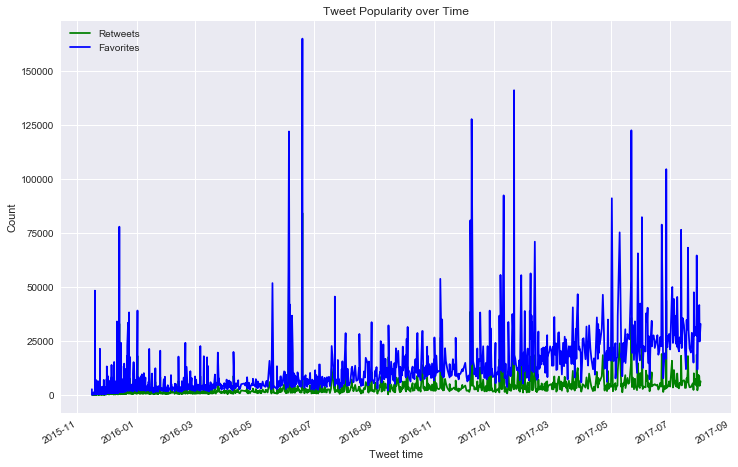

In [1075]:
df['retweets'].plot(color = 'green', label = 'Retweets')
df['favorite_count'].plot(color = 'blue', label = 'Favorites', figsize = (12, 8))
plt.legend(loc = 'upper left')
plt.ylabel('Count')
plt.xlabel('Tweet time')
plt.title('Tweet Popularity over Time')

plt.show()

With this plot we can see a gradual increase in favorite counts over time but not so much with retweets

### Most common Dog Stage and Most Popular Dog Stage

In [1076]:
df['dog_stage'].value_counts()

pupper     180
doggo      61 
puppo      27 
floofer    3  
Name: dog_stage, dtype: int64

In [765]:
#most common dog stage is pupper

In [1077]:
df.groupby('dog_stage')['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,61.0,11.704918,1.636503,5.0,11.0,12.0,13.0,14.0
floofer,3.0,12.666667,0.577350,12.0,12.5,13.0,13.0,13.0
pupper,180.0,10.829222,1.413854,6.0,10.0,11.0,12.0,14.0
puppo,27.0,12.111111,1.219500,9.0,12.0,12.0,13.0,14.0


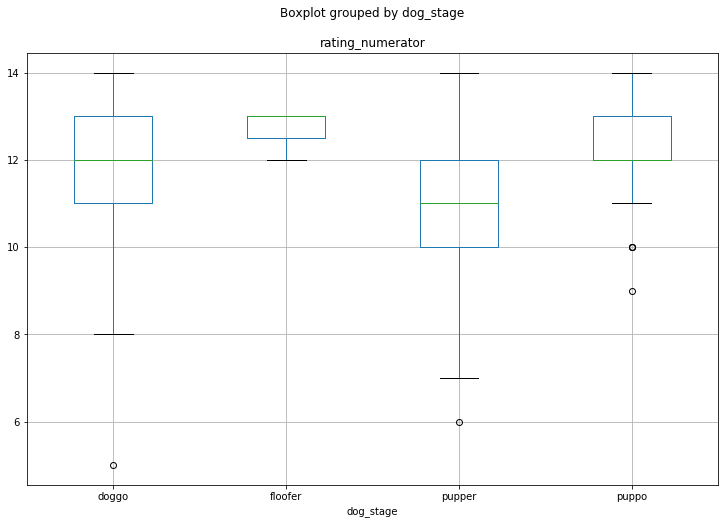

In [1010]:
df.boxplot(column = 'rating_numerator', by = 'dog_stage', figsize=(12, 8));

Puppers appear to get, on average, lower ratings than than the other dog stages. It is interesting to note that the standard deviation for pupper is the second highest at 1.41. This std makes sense though, because we can see that there are some outliers on the boxplot, as well as for doggo and puppo.

Floofers, on average, have higher ratings than the other dog stages, with a mean of 12.66. Floofers appear to be consistently rated above 10. We also have to take into consideration that there are only 3 counts of floofers, a much lower count than the other stages

In [ ]:
#the most popular dog stage by rating seems to be floofer but i would argue that perhaps
#it is puppo or doggo because there is a much better sample size

#### Most popular dog stage by retweets and favorites

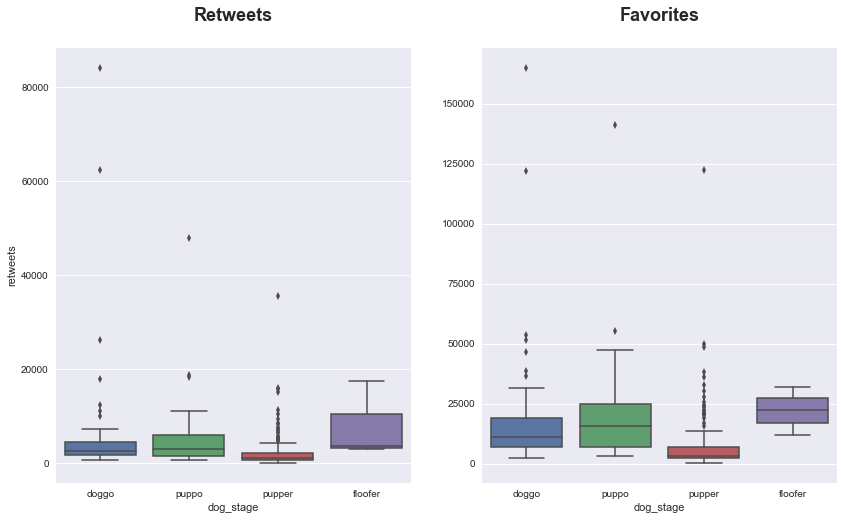

In [1057]:
import seaborn as sns


plt.subplots(figsize=(14, 8))
plt.subplot(121)
sns.boxplot(x = df.dog_stage, y = df.retweets,  linewidth=1.5)
plt.title('Retweets\n', fontsize=18, weight='bold');


plt.subplot(122)
sns.boxplot(x = df.dog_stage, y = df.favorite_count,  linewidth=1.5)
plt.title('Favorites\n', fontsize=18, weight='bold')
plt.ylabel('');
#plt.savefig('boxplot.png')

ref:
    https://stackoverflow.com/questions/44975337/side-by-side-boxplots-with-pandas?rq=1

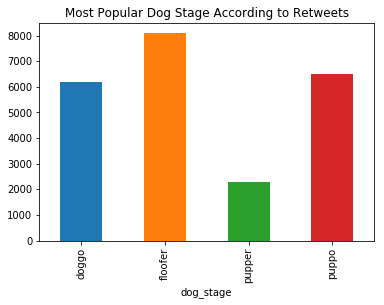

In [55]:
df.groupby('dog_stage').retweets.mean().plot(kind='bar')
plt.title('Most Popular Dog Stage According to Retweets');
plt.savefig('pop_dog_stage_retweets.png')

If we look at popularity by retweets, floofer is the most popular dog type, with this dog stage being retweeted the most

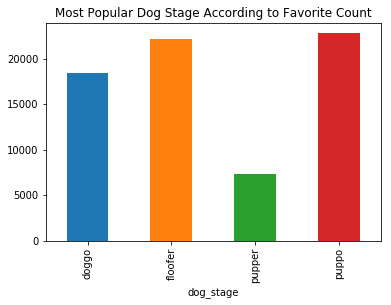

In [54]:
import matplotlib.pyplot as plt
df.groupby('dog_stage').favorite_count.mean().plot(kind='bar')
plt.title('Most Popular Dog Stage According to Favorite Count');
plt.savefig('bar_pop_dog_stage_fav_count.png')

If we group the dog stages by favorite count then we see that puppo is the most popular by recieving the most 'likes'

### Most Common Dog Breeds

In [1078]:
df['dog_breed'].value_counts()

golden_retriever                  154
labrador_retriever                107
pembroke                          95 
chihuahua                         91 
pug                               62 
toy_poodle                        51 
chow                              47 
samoyed                           42 
pomeranian                        42 
malamute                          33 
chesapeake_bay_retriever          31 
cocker_spaniel                    30 
french_bulldog                    30 
miniature_pinscher                25 
eskimo_dog                        22 
german_shepherd                   21 
cardigan                          21 
staffordshire_bullterrier         20 
beagle                            20 
siberian_husky                    20 
shih-tzu                          20 
maltese_dog                       19 
rottweiler                        19 
kuvasz                            18 
lakeland_terrier                  18 
shetland_sheepdog                 18 
italian_grey

In [924]:
#df.groupby('dog_breed')['rating_numerator'].sum()

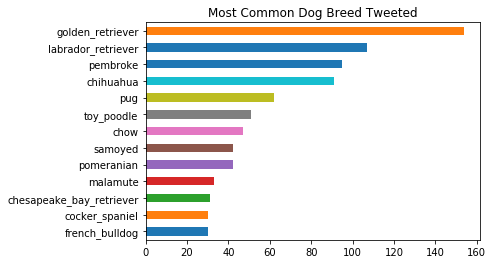

In [56]:
df.dog_breed.value_counts()[12::-1].plot(kind='barh')
plt.title('Most Common Dog Breed Tweeted')
plt.savefig('most_common_breed.png')

The bar graph shows us that the most common dog breed is the Golden Retriever with 154 tweets of this particular dog breed. The second most common breed is the Labrador Retriever with people tweeting this breed 107 times.

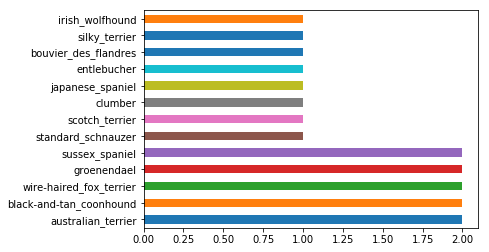

In [931]:
df.dog_breed.value_counts().sort_values(ascending = True)[12::-1].plot(kind='barh')

These are the 12 most uncommon dog breeds that have been tweeted, with the tweets counts in the single digits

### Most Popular Dog Breed

In [1079]:
df[df['rating_numerator'] == df['rating_numerator'].max()]

,tweet_id,dog_name,tweet_text,dog_breed,confidence_level,dog_stage,rating_numerator,rating_denominator,retweets,favorite_count,img_num
tweet_date,,,,,,,,,,,
2017-07-26 15:59:51,890240255349198849,Cassie,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,pembroke,0.511319,doggo,14.0,10.0,7275,31459,1
2017-07-10 15:58:53,884441805382717440,None,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",pembroke,0.993225,NaN,14.0,10.0,5575,26624,1
2017-07-02 15:32:16,881536004380872706,None,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \r\n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,samoyed,0.281463,pupper,14.0,10.0,15739,48795,1
2017-06-23 01:10:23,878057613040115712,Emmy,This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe,french_bulldog,0.839097,NaN,14.0,10.0,6746,41508,1
2017-05-28 17:23:24,868880397819494401,Walter,This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF,french_bulldog,0.099984,NaN,14.0,10.0,14570,65496,1
2017-05-12 17:12:53,863079547188785154,None,"Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",lakeland_terrier,0.275242,NaN,14.0,10.0,1119,8830,1
2017-04-24 15:13:52,856526610513747968,None,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",old_english_sheepdog,0.798481,NaN,14.0,10.0,1942,12049,1
2017-04-23 23:01:59,856282028240666624,Cermet,"This is Cermet, Paesh, and Morple. They are absolute h*ckin superstars. Watered every day so they can grow. 14/10 for all https://t.co/GUefqUmZv8",chihuahua,0.876543,NaN,14.0,10.0,6542,28237,4
2017-04-17 23:52:16,854120357044912130,None,Sometimes you guys remind me just how impactful a pupper can be. Cooper will be remembered as a good boy by so many. 14/10 rest easy friend https://t.co/oBL7LEJEzR,black-and-tan_coonhound,0.854861,pupper,14.0,10.0,7816,32763,4


In [1080]:
df[df['rating_numerator'] == df['rating_numerator'].min()]

,tweet_id,dog_name,tweet_text,dog_breed,confidence_level,dog_stage,rating_numerator,rating_denominator,retweets,favorite_count,img_num
tweet_date,,,,,,,,,,,
2015-12-20 03:58:55,678424312106393600,Crystal,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz,maltese_dog,0.759945,NaN,2.0,10.0,2719,5670,1
2015-11-21 01:34:35,667878741721415682,Tedrick,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&2/10 https://t.co/LvP1TTYSCN,miniature_pinscher,0.106003,NaN,2.0,10.0,122,399,1


In [1081]:
dogs = df.groupby('dog_breed').mean()
dogs.head()

,confidence_level,rating_numerator,rating_denominator,retweets,favorite_count,img_num
dog_breed,,,,,,
afghan_hound,0.433959,9.666667,10.0,5673.000000,16648.666667,1.000000
airedale,0.583771,9.833333,10.0,1323.000000,5090.333333,1.166667
american_staffordshire_terrier,0.561668,11.000000,10.0,2121.333333,8058.200000,1.066667
appenzeller,0.503665,11.000000,10.0,1380.500000,7072.000000,1.000000
australian_terrier,0.307584,11.500000,10.0,2920.500000,10732.500000,2.000000


In [1082]:
dog_sorted = dogs['rating_numerator'].sort_values()
dog_sorted

dog_breed
japanese_spaniel               5.000000 
soft-coated_wheaten_terrier    8.642857 
walker_hound                   8.750000 
scotch_terrier                 9.000000 
tibetan_terrier                9.250000 
dalmatian                      9.333333 
boston_bull                    9.416667 
welsh_springer_spaniel         9.500000 
dandie_dinmont                 9.571429 
miniature_schnauzer            9.600000 
norwich_terrier                9.600000 
afghan_hound                   9.666667 
redbone                        9.666667 
maltese_dog                    9.736842 
rhodesian_ridgeback            9.750000 
scottish_deerhound             9.750000 
airedale                       9.833333 
saint_bernard                  9.857143 
mexican_hairless               9.857143 
newfoundland                   9.857143 
miniature_poodle               9.875000 
english_setter                 9.875000 
miniature_pinscher             10.000000
irish_terrier                  10.000000
ibizan

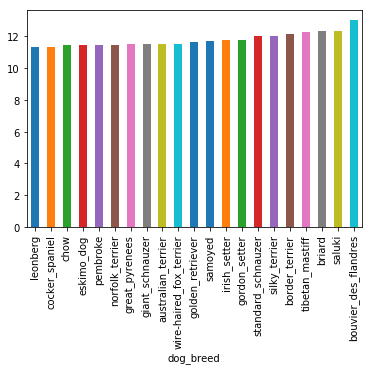

In [51]:
df.groupby('dog_breed').rating_numerator.mean().sort_values(ascending = False)[20::-1].plot(kind='bar');
plt.savefig('pop_dog_ratings.png')

The dog breed with the hihest rating is the bouvier_des_flanders, but this does not provide a difinitive conclusion to popularity of breed as this dog might be the only tweet for this breed

In [958]:
#df[df.dog_breed == 'soft-coated_wheaten_terrier']

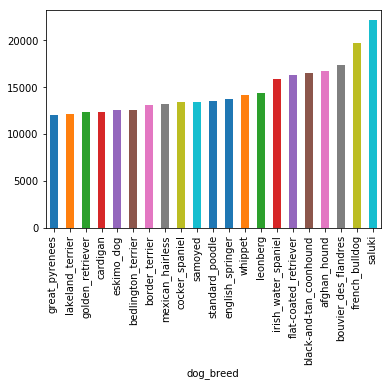

In [50]:
df.groupby('dog_breed').favorite_count.mean().sort_values(ascending = False)[20::-1].plot(kind='bar');
plt.savefig('pop_dog_favs.png')

The most popular dog breed based on Favourite count is the Saluki

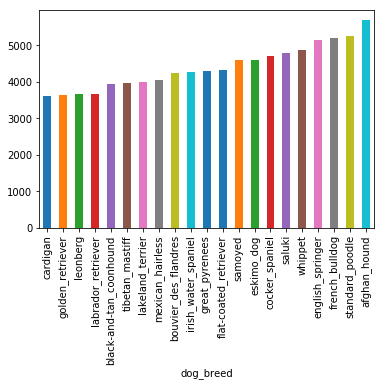

In [49]:
df.groupby('dog_breed').retweets.mean().sort_values(ascending = False)[20::-1].plot(kind='bar');
plt.savefig('pop_dog_retweets.png')

The most popular dog breed based on retweets is the Afghan Hound

In [865]:
df.set_index('tweet_date', inplace=True)

In [866]:
df.head(1)

,tweet_id,dog_name,tweet_text,dog_breed,confidence_level,dog_stage,rating_numerator,rating_denominator,retweets,favorite_count,img_num
tweet_date,,,,,,,,,,,
2017-08-01 00:17:27,892177421306343426,Tilly,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",chihuahua,0.323581,NaN,13.0,10.0,6184,32777,1


### Relationship between favorite count and retweets

In [915]:
df[['favorite_count', 'retweets', 'rating_numerator']].corr()

,favorite_count,retweets,rating_numerator
favorite_count,1.000000,0.930869,0.064874
retweets,0.930869,1.000000,0.049422
rating_numerator,0.064874,0.049422,1.000000


In [868]:
df[df['favorite_count'] == df['favorite_count'].max()]

,tweet_id,dog_name,tweet_text,dog_breed,confidence_level,dog_stage,rating_numerator,rating_denominator,retweets,favorite_count,img_num
tweet_date,,,,,,,,,,,
2016-06-18 18:26:18,744234799360020481,None,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,labrador_retriever,0.825333,doggo,13.0,10.0,84174,164996,1


In [869]:
df[df['favorite_count'] == df['favorite_count'].min()]

,tweet_id,dog_name,tweet_text,dog_breed,confidence_level,dog_stage,rating_numerator,rating_denominator,retweets,favorite_count,img_num
tweet_date,,,,,,,,,,,
2015-11-16 03:55:04,666102155909144576,None,Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,english_setter,0.298617,NaN,11.0,10.0,12,80,1


In [870]:
df[df['retweets'] == df['retweets'].max()]

,tweet_id,dog_name,tweet_text,dog_breed,confidence_level,dog_stage,rating_numerator,rating_denominator,retweets,favorite_count,img_num
tweet_date,,,,,,,,,,,
2016-06-18 18:26:18,744234799360020481,None,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,labrador_retriever,0.825333,doggo,13.0,10.0,84174,164996,1


In [ ]:
#the same tweets has both the highest favorite counts and retweets

In [871]:
df[df['retweets'] == df['retweets'].min()]

,tweet_id,dog_name,tweet_text,dog_breed,confidence_level,dog_stage,rating_numerator,rating_denominator,retweets,favorite_count,img_num
tweet_date,,,,,,,,,,,
2015-11-16 03:55:04,666102155909144576,None,Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,english_setter,0.298617,NaN,11.0,10.0,12,80,1


In [ ]:
#the same is true for the tweet that has both the lowest favorite counts, it also has the lowest
#retweet count

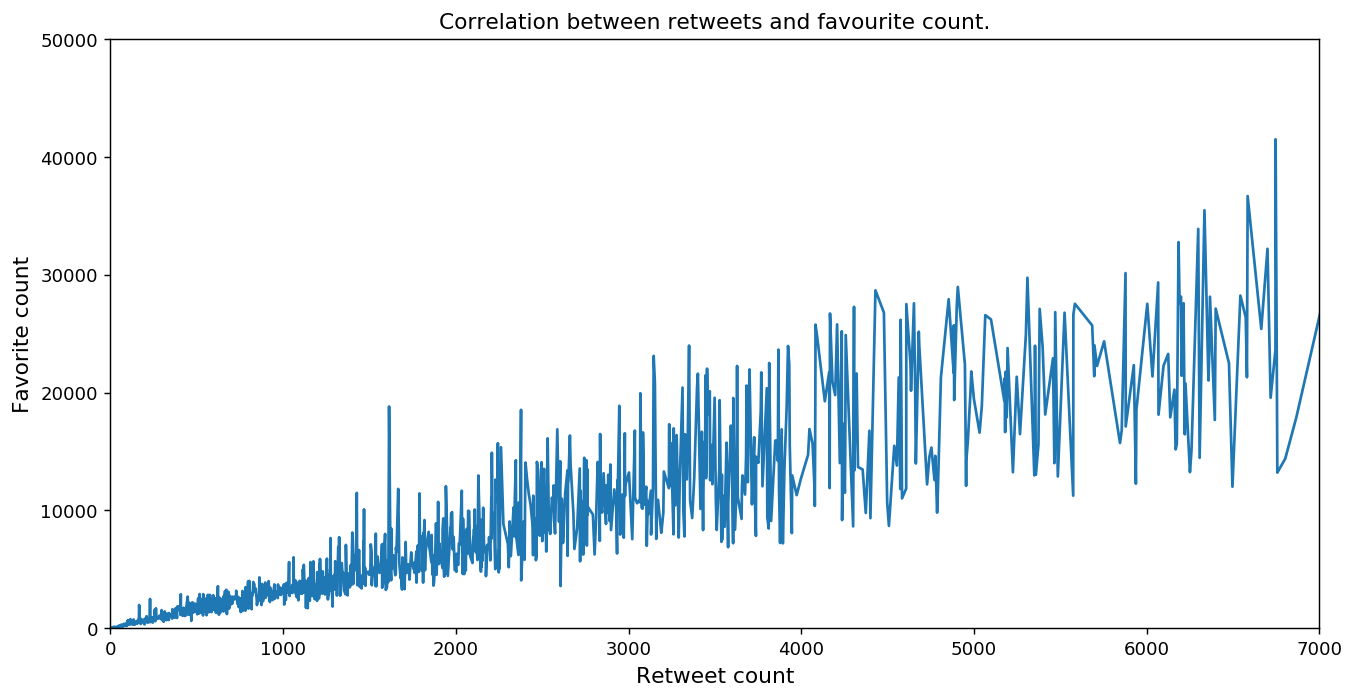

<Figure size 432x288 with 0 Axes>

In [48]:
rel = df.groupby('retweets')['favorite_count'].mean()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#x-axis
plt.xlabel('Retweet count', fontsize = 12)
#y-axis
plt.ylabel('Favorite count', fontsize = 12)
#title
plt.title('Correlation between retweets and favourite count.')
plt.xlim(0, 7000)
plt.ylim(0, 50000)
#plotting the graph
plt.plot(rel)

#display the line plot
plt.show()
plt.savefig('line_cor_retweet_fav.png')

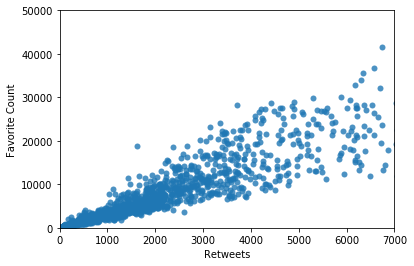

<Figure size 432x288 with 0 Axes>

In [47]:
plt.scatter(df.retweets, df.favorite_count, lw=0,alpha=0.8)
plt.xlabel('Retweets')
plt.ylabel('Favorite Count')
plt.xlim(0, 7000)
plt.ylim(0, 50000)
plt.show()
plt.savefig('scat_cor_retweet_fav.png')

The line graph and scattor plot seem to indicate that the higher the favorite count the higher the retweet count. This shows a strong positive linear relationship, with a correlation coefficient of 0.93